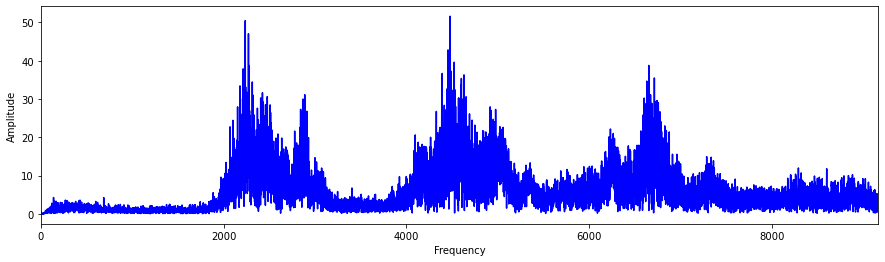

In [1]:
#-*- coding:utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
from scipy.io import wavfile
import librosa
import os.path
%matplotlib inline

Fs = 183280.
Ts = 1 / Fs
te = 1.0
t = np.arange(0.0, te, Ts)

path="C:\\Users\\dainjeong77\\oss"
fname="\\example.wav.wav"
data, signal = wavfile.read(path+fname)

N = len(signal)

k = np.arange(N)
T = N / Fs
freq = k / T
freq = freq[range(int(N/2))]

# FFT 적용
yfft = np.fft.fft(signal)
yf = yfft / N
yf = yf[range(int(N/2))]

plt.rcParams["figure.figsize"] = (15,4)

# FFT 출력
plt.plot(freq, abs(yf), 'b')
plt.xlabel('Frequency')

plt.ylabel('Amplitude')
plt.xlim(0, Fs / 20)
plt.show()

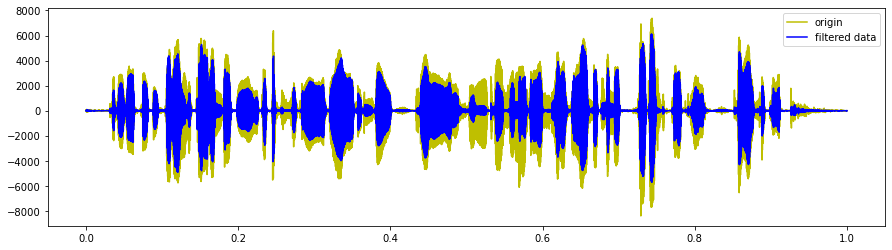

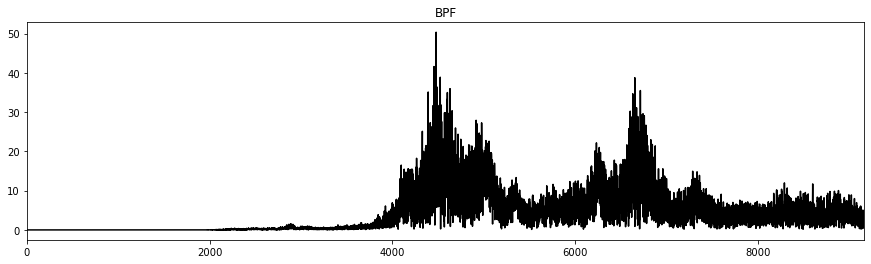

In [2]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting ( 나머지 주파수는 자르고 40 ~ 100 hz 만 추출하겠다.)
lowcut = 4000.0
highcut = 10000.0
    
# BPF
yy = butter_bandpass_filter(signal, lowcut, highcut, Fs, order=5)

# 1. 원 신호 Plot
plt.plot(t, signal, 'y', label='origin')

# 2. 필터 적용된 Plot
plt.plot(t, yy, 'b', label='filtered data')
plt.legend()
plt.show() 
    
# 3. 필터 적용된 FFT Plot
yf = np.fft.fft(yy) / N
yf = yf[range(int(N/2))]

plt.title("BPF")
plt.plot(freq, abs(yf), 'k')
plt.xlim(0, Fs / 20)
plt.show()

In [25]:
import librosa
import IPython
mfcc = librosa.feature.mfcc(signal, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)



ValueError: operands could not be broadcast together with shapes (1,201) (0,) 

In [22]:
os.chdir(currentPath)

NameError: name 'currentPath' is not defined